SQLite database created successfully
Generating 10,000 startup records...
Data inserted into SQLite successfully
CSV file created successfully
Spark DataFrame created successfully

PYSPARK QUERIES:
1. Startups by City:
+---------+-----+
|     City|Count|
+---------+-----+
|Bangalore| 1657|
|  Chennai| 1641|
|   Mumbai| 1736|
|     Pune| 1666|
|    Delhi| 1664|
|Hyderabad| 1636|
+---------+-----+

2. Average Funding by Sector:
+----------+-----------------+
|    Sector|       AvgFunding|
+----------+-----------------+
| Education|9345465.136965377|
|Healthcare|9211517.596806386|
|Technology|9590867.710617283|
|E-Commerce|9279988.197051598|
|   FinTech| 9674693.50862069|
+----------+-----------------+

3. Startups by Status:
+--------+-----+
|  Status|Count|
+--------+-----+
|     IPO| 2478|
|  Active| 2464|
|Acquired| 2559|
|  Closed| 2499|
+--------+-----+

4. Maximum Funding by City:
+---------+----------+
|     City|MaxFunding|
+---------+----------+
|Bangalore|  49899087|
|  Chennai

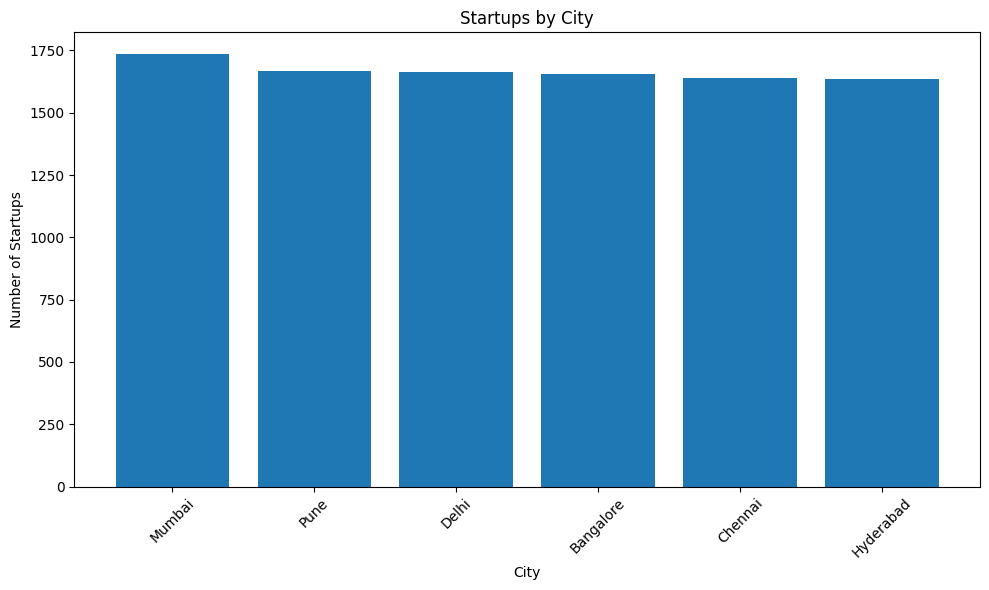

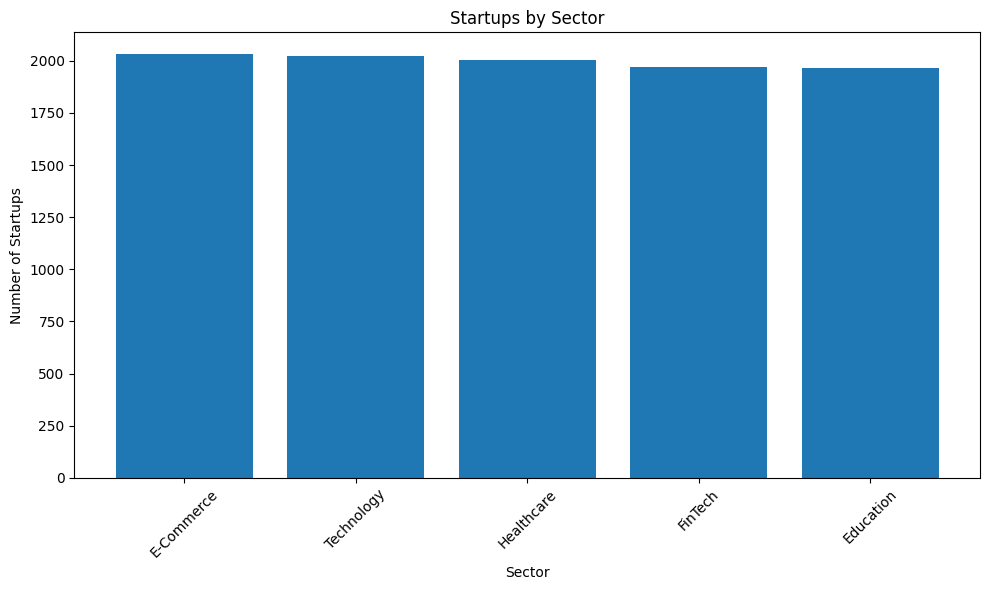

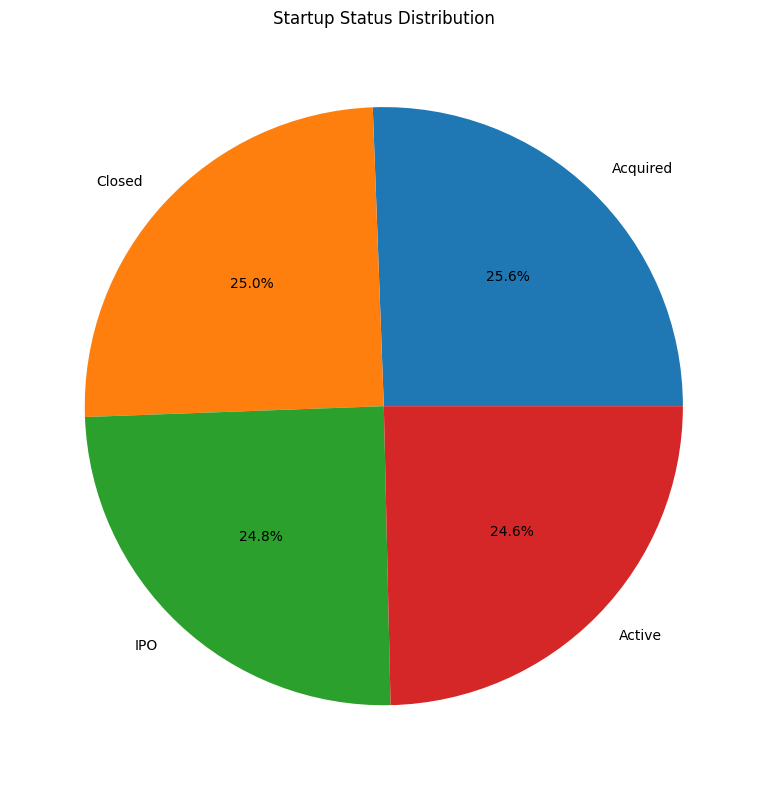

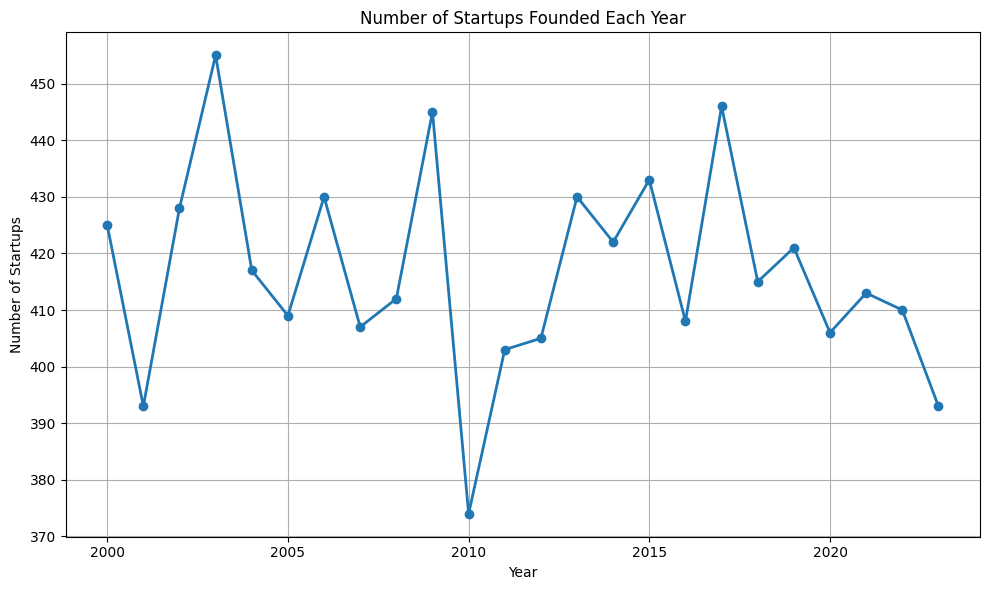

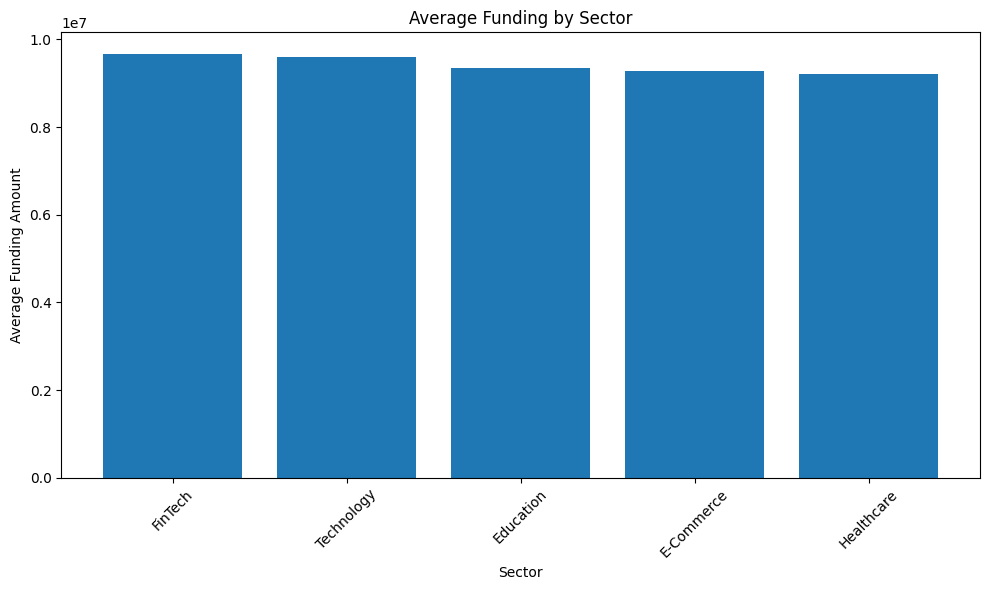

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Files downloaded successfully!
Analysis completed successfully!


In [5]:
# Step 1: Install required packages
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Step 2: Import libraries
import sqlite3
import pandas as pd
import numpy as np
import random
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, avg, sum, max, min
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Initialize Spark
spark = SparkSession.builder.appName("StartupAnalysis").getOrCreate()

# Step 4: Configuration
NUM_STARTUPS = 10000
DB_NAME = 'startups.db'
TABLE_NAME = 'startups'

# Step 5: Create SQLite database and table
conn = sqlite3.connect(DB_NAME)
cursor = conn.cursor()
cursor.execute(f"DROP TABLE IF EXISTS {TABLE_NAME}")
cursor.execute(f'''
CREATE TABLE {TABLE_NAME} (
    StartupID INTEGER PRIMARY KEY,
    StartupName TEXT,
    Founders TEXT,
    FoundedYear INTEGER,
    City TEXT,
    Sector TEXT,
    FundingStage TEXT,
    FundingAmount INTEGER,
    Status TEXT
)
''')
conn.commit()
print("SQLite database created successfully")

# Step 6: Generate data with Pandas and store in SQLite
cities = ['Bangalore', 'Mumbai', 'Delhi', 'Hyderabad', 'Chennai', 'Pune']
sectors = ['Technology', 'E-Commerce', 'FinTech', 'Healthcare', 'Education']
statuses = ['Active', 'Acquired', 'Closed', 'IPO']

print("Generating 10,000 startup records...")
data = []
for i in range(NUM_STARTUPS):
    startup_id = i + 1
    name = f"Startup_{startup_id}"
    founders = f"Founder_{random.randint(1, 500)}"
    founded_year = random.randint(2000, 2023)
    city = random.choice(cities)
    sector = random.choice(sectors)

    funding_options = [
        ('Seed', 10000, 200000),
        ('Series A', 200000, 2000000),
        ('Series B', 2000000, 10000000),
        ('Series C', 10000000, 50000000)
    ]
    funding_stage, min_fund, max_fund = random.choice(funding_options)
    funding_amount = random.randint(min_fund, max_fund)

    status = random.choice(statuses)
    data.append((startup_id, name, founders, founded_year, city, sector, funding_stage, funding_amount, status))

# Insert data into SQLite
cursor.executemany(f'''
INSERT INTO {TABLE_NAME} (StartupID, StartupName, Founders, FoundedYear, City, Sector, FundingStage, FundingAmount, Status)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
''', data)
conn.commit()
print("Data inserted into SQLite successfully")

# Step 7: Read data from SQLite into Pandas
df = pd.read_sql_query(f"SELECT * FROM {TABLE_NAME}", conn)
df.to_csv('startups.csv', index=False)
print("CSV file created successfully")

# Step 8: Load data into PySpark
spark_df = spark.read.csv('startups.csv', header=True, inferSchema=True)
print("Spark DataFrame created successfully")

# Step 9: PySpark Queries
print("\nPYSPARK QUERIES:")

# Query 1: Count startups by city
print("1. Startups by City:")
result1 = spark_df.groupBy("City").agg(count("*").alias("Count"))
result1.show()

# Query 2: Average funding by sector
print("2. Average Funding by Sector:")
result2 = spark_df.groupBy("Sector").agg(avg("FundingAmount").alias("AvgFunding"))
result2.show()

# Query 3: Startups by status
print("3. Startups by Status:")
result3 = spark_df.groupBy("Status").agg(count("*").alias("Count"))
result3.show()

# Query 4: Maximum funding by city
print("4. Maximum Funding by City:")
result4 = spark_df.groupBy("City").agg(max("FundingAmount").alias("MaxFunding"))
result4.show()

# Query 5: Startups founded each year
print("5. Startups Founded Each Year:")
result5 = spark_df.groupBy("FoundedYear").agg(count("*").alias("Count")).orderBy("FoundedYear")
result5.show()

# Query 6: Total funding by sector
print("6. Total Funding by Sector:")
result6 = spark_df.groupBy("Sector").agg(sum("FundingAmount").alias("TotalFunding"))
result6.show()

# Query 7: Funding stage distribution
print("7. Funding Stage Distribution:")
result7 = spark_df.groupBy("FundingStage").agg(count("*").alias("Count"))
result7.show()

# Query 8: Top 5 cities with most startups
print("8. Top 5 Cities with Most Startups:")
result8 = spark_df.groupBy("City").agg(count("*").alias("Count")).orderBy(col("Count").desc())
result8.show(5)

# Query 9: Average funding by status
print("9. Average Funding by Status:")
result9 = spark_df.groupBy("Status").agg(avg("FundingAmount").alias("AvgFunding"))
result9.show()

# Query 10: Startups with highest funding
print("10. Top 10 Startups with Highest Funding:")
result10 = spark_df.orderBy(col("FundingAmount").desc()).select("StartupName", "FundingAmount", "City", "Sector")
result10.show(10)

# Step 10: Pandas Queries
print("\nPANDAS QUERIES:")

# Query 1: Basic info
print("1. DataFrame Info:")
print(df.info())

# Query 2: Count by city
print("2. Count by City:")
city_counts = df['City'].value_counts()
print(city_counts)

# Query 3: Average funding by sector
print("3. Average Funding by Sector:")
avg_funding = df.groupby('Sector')['FundingAmount'].mean()
print(avg_funding)

# Query 4: Filter active startups
print("4. Active Startups:")
active_startups = df[df['Status'] == 'Active']
print(f"Number of active startups: {len(active_startups)}")

# Query 5: Top funded startups
print("5. Top 10 Funded Startups:")
top_funded = df.nlargest(10, 'FundingAmount')[['StartupName', 'FundingAmount', 'City', 'Sector']]
print(top_funded)

# Query 6: Startups by year
print("6. Startups by Year:")
startups_per_year = df['FoundedYear'].value_counts().sort_index()
print(startups_per_year)

# Query 7: Funding amount statistics
print("7. Funding Amount Statistics:")
funding_stats = df['FundingAmount'].describe()
print(funding_stats)

# Query 8: Cross tabulation of sector and status
print("8. Sector vs Status Cross Tab:")
sector_status_ct = pd.crosstab(df['Sector'], df['Status'])
print(sector_status_ct)

# Query 9: Startups in Bangalore
print("9. Startups in Bangalore:")
bangalore_startups = df[df['City'] == 'Bangalore']
print(f"Number of startups in Bangalore: {len(bangalore_startups)}")

# Query 10: Average funding by city
print("10. Average Funding by City:")
avg_funding_city = df.groupby('City')['FundingAmount'].mean()
print(avg_funding_city)

# Step 11: Data Visualization
print("\nDATA VISUALIZATION:")

# Visualization 1: Startups by city
plt.figure(figsize=(10, 6))
city_counts = df['City'].value_counts()
plt.bar(city_counts.index, city_counts.values)
plt.title('Startups by City')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Startups by sector
plt.figure(figsize=(10, 6))
sector_counts = df['Sector'].value_counts()
plt.bar(sector_counts.index, sector_counts.values)
plt.title('Startups by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 3: Status distribution
plt.figure(figsize=(8, 8))
status_counts = df['Status'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Startup Status Distribution')
plt.tight_layout()
plt.show()

# Visualization 4: Startups by year
plt.figure(figsize=(10, 6))
yearly_counts = df.groupby('FoundedYear').size()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, markersize=6)
plt.title('Number of Startups Founded Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 5: Average funding by sector
plt.figure(figsize=(10, 6))
sector_funding = df.groupby('Sector')['FundingAmount'].mean().sort_values(ascending=False)
plt.bar(sector_funding.index, sector_funding.values)
plt.title('Average Funding by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Funding Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 12: Download files and cleanup
files.download('startups.csv')
files.download(DB_NAME)
print("Files downloaded successfully!")

conn.close()
spark.stop()
print("Analysis completed successfully!")
